In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as spec
import pandas as pd
from astropy.io import ascii
from astropy.table import Table, vstack
import os.path
from os import path

import sys
sys.path.insert(0, '..')
import dr25Models as funcModels

In [2]:
dataType = "fpwgpc"
bootstrapType = "baselineFpwgpc"
outputDir = bootstrapType + "Output/"

htmlLabel = dataType + bootstrapType

stellarType = "GK"
scoreCut = 0.0;
if False:
    periodMin = 200;
    periodMax = 400;
#    rpMin = 0.75;
#    rpMax = 2.0;
    rpMin = 0;
    rpMax = 100;
    mesMin = 7;
    mesMax = 15;
else:
    periodMin = 50;
    periodMax = 600;
    rpMin = 0.5;
    rpMax = 15;
    mesMin = 7;
    mesMax = 30;



In [3]:
def drawHeatMap(dataArray, imageSize, x, y, nData=[], colorBarLabel="", textOn=True, forceInt=True):
    dx = x[(1,0)] - x[(0,0)];
    dy = y[(0,1)] - y[(0,0)];
    extent = [x[(0,0)], x[(-1,0)]+dx,y[(0,0)],y[(0,-1)]+dy];
    plt.figure(figsize=imageSize);
    # fig, ax = plt.subplots(figsize=imageSize);
    ax = plt.gca()

    da = np.transpose(dataArray);
#    im = ax.imshow(da, extent = extent, origin='lower');
    im = ax.imshow(da, extent = extent, origin='lower', cmap="Greys");
    ax.set_aspect(10);
    
    if len(nData) == 0:
        nData = np.ones(dataArray.shape)

    # ax.imshow(da, origin='lower');
    arrayShape = da.shape;
    minda = np.min(da)
    maxda = np.max(da)
    daRange = maxda - minda;
    for i in range(arrayShape[0]):
        for j in range(arrayShape[1]):
            if da[i, j] > minda + daRange*0.5:
                # cstr = "k"
                cstr = "w"
            else:
                # cstr = "w"
                cstr = "k"
            if np.abs(da[i,j]) < 100:
                fsz = 9
            else:
                fsz = 9
            
            if textOn:
                if nData[(j,i)] > 0:
                    if forceInt:
                        ax.text(x[(j,i)]+dx/2, y[(j,i)]+dy/2, da[i, j].astype("int"),
                               ha="center", va="center", color=cstr, fontsize=fsz)
                    else:
                        ax.text(x[(j,i)]+dx/2, y[(j,i)]+dy/2, da[i, j],
                               ha="center", va="center", color=cstr, fontsize=fsz)                        
                else:
                    ax.text(x[(j,i)]+dx/2, y[(j,i)]+dy/2, "-",
                           ha="center", va="center", color=cstr, fontsize=fsz)

            
    
    ax.tick_params(axis = "both", labelsize = 12)
    im_ratio = float(da.shape[0])/da.shape[1] 
    cbh = plt.colorbar(im,fraction=0.024*im_ratio, pad=0.02)
    cbh.ax.set_ylabel(colorBarLabel, fontSize = 16);


In [4]:
dataLoc = "../data/"

# starlist = dataLoc + "dr25_stellar_updated_feh_" + stellarType + ".txt"
if bootstrapType == "":
    starlist = "../stellarCatalogs/dr25_stellar_supp_gaia_clean_" + stellarType + ".txt"
else:
    starlist = "bootstrapOut/" + bootstrapType + "StellarCatalog.csv"
kic = pd.read_csv(starlist)

if dataType == "dr25":
    invList = dataLoc + "kplr_dr25_inv_tces.txt"
    scr1List = dataLoc + "kplr_dr25_scr1_tces.txt"
    scr2List = dataLoc + "kplr_dr25_scr2_tces.txt"
    scr3List = dataLoc + "kplr_dr25_scr3_tces.txt"
else:
    invList = dataLoc + "kplr_dr25_inv_" + dataType + "_tces.txt"
    scr1List = dataLoc + "kplr_dr25_scr1_" + dataType + "_tces.txt"
    scr2List = dataLoc + "kplr_dr25_scr2_" + dataType + "_tces.txt"
    scr3List = dataLoc + "kplr_dr25_scr3_" + dataType + "_tces.txt"
    

invTcesFull = ascii.read(invList);
scr1TcesFull = ascii.read(scr1List);
scr2TcesFull = ascii.read(scr2List);
scr3TcesFull = ascii.read(scr3List);

invTcesFullPd = invTcesFull.to_pandas();
scr1TcesFullPd = scr1TcesFull.to_pandas();
scr2TcesFullPd = scr2TcesFull.to_pandas();
scr3TcesFullPd = scr3TcesFull.to_pandas();


In [5]:
invDropList = ascii.read(dataLoc + "kplr_droplist_inv.txt");
scr1DropList = ascii.read(dataLoc + "kplr_droplist_scr1.txt");
scr2DropList = ascii.read(dataLoc + "kplr_droplist_scr2.txt");
scr3DropList = ascii.read(dataLoc + "kplr_droplist_scr3.txt");
invDropList = invDropList.to_pandas();
scr1DropList = scr1DropList.to_pandas();
scr2DropList = scr2DropList.to_pandas();
scr3DropList = scr3DropList.to_pandas();

invTcesPd = invTcesFullPd[~invTcesFullPd['TCE_ID'].isin(invDropList['TCE_ID'])];
scr1TcesPd = scr1TcesFullPd[~scr1TcesFullPd['TCE_ID'].isin(scr1DropList['TCE_ID'])];
scr2TcesPd = scr2TcesFullPd[~scr2TcesFullPd['TCE_ID'].isin(scr2DropList['TCE_ID'])];
scr3TcesPd = scr3TcesFullPd[~scr3TcesFullPd['TCE_ID'].isin(scr3DropList['TCE_ID'])];

print("length of invTcesFull = " + str(len(invTcesFullPd)) 
      + ", length of invTces = " + str(len(invTcesPd)))
print("length of scr1TcesFull = " + str(len(scr1TcesFullPd)) 
      + ", length of scr1Tces = " + str(len(scr1TcesPd)))
print("length of scr2TcesFull = " + str(len(scr2TcesFullPd)) 
      + ", length of scr2Tces = " + str(len(scr2TcesPd)))
print("length of scr3TcesFull = " + str(len(scr3TcesFullPd)) 
      + ", length of scr3Tces = " + str(len(scr3TcesPd)))

length of invTcesFull = 19531, length of invTces = 14952
length of scr1TcesFull = 24209, length of scr1Tces = 13778
length of scr2TcesFull = 24217, length of scr2Tces = 13817
length of scr3TcesFull = 19811, length of scr3Tces = 9240


In [6]:
invTces = Table.from_pandas(invTcesPd)
scr1Tces = Table.from_pandas(scr1TcesPd)
scr2Tces = Table.from_pandas(scr2TcesPd)
scr3Tces = Table.from_pandas(scr3TcesPd)

# create a final set of scrambled TCEs
scrTces = vstack([scr1Tces, scr2Tces, scr3Tces])
# scrTces = scr1Tces

print("length of scrTces = " + str(len(scrTces)))

length of scrTces = 36835


In [7]:
invTces = invTces[np.in1d(invTces['KIC'],kic.kepid)]
scrTces = scrTces[np.in1d(scrTces['KIC'],kic.kepid)]

print("length of invTces = " + str(len(invTces)))
print("length of scrTces = " + str(len(scrTces)))


length of invTces = 1053
length of scrTces = 3387


In [8]:
subSample = np.random.rand(len(scrTces))
# scrTcesSub = scrTces[subSample < 1./3]
scrTcesSub = scrTces
print("length of scrTcesSub = " + str(len(scrTcesSub)))

length of scrTcesSub = 3387


In [9]:
# syntheticTrueFps = vstack([invTces,scrTcesSub])
syntheticTrueFps = vstack([invTces,invTces,invTces,scrTcesSub])
print("length of syntheticTrueFps = " + str(len(syntheticTrueFps)))

length of syntheticTrueFps = 6546


In [10]:
spIndex = np.where(np.all([
    syntheticTrueFps['Rp']>rpMin,syntheticTrueFps['Rp']<rpMax,\
    syntheticTrueFps['period']>periodMin,syntheticTrueFps['period']<periodMax], axis=0))
spSyntheticTrueFps = syntheticTrueFps[spIndex]

print("length of spSyntheticTrueFps = " + str(len(spSyntheticTrueFps)))


length of spSyntheticTrueFps = 5722


In [11]:
spSyntheticPcs = spSyntheticTrueFps[(spSyntheticTrueFps['Disp']=='PC') & (spSyntheticTrueFps['Score']>=scoreCut)]
spSyntheticFps = spSyntheticTrueFps[(spSyntheticTrueFps['Disp']=='FP') | (spSyntheticTrueFps['Score']<scoreCut)]

print("length of spSyntheticPcs = " + str(len(spSyntheticPcs)))
print("length of spSyntheticFps = " + str(len(spSyntheticFps)))


length of spSyntheticPcs = 265
length of spSyntheticFps = 5457


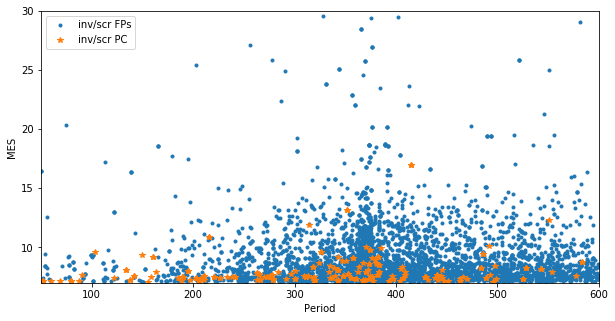

In [12]:
plt.figure(figsize=(10,5));
# plt.subplot(2,2,1);
plt.plot(spSyntheticFps['period'], spSyntheticFps['MES'], ".", 
        spSyntheticPcs['period'], spSyntheticPcs['MES'], "*");
plt.ylim(mesMin,mesMax);
plt.xlim(periodMin,periodMax);
plt.legend(("inv/scr FPs", "inv/scr PC"));
plt.ylabel('MES');
plt.xlabel('Period');


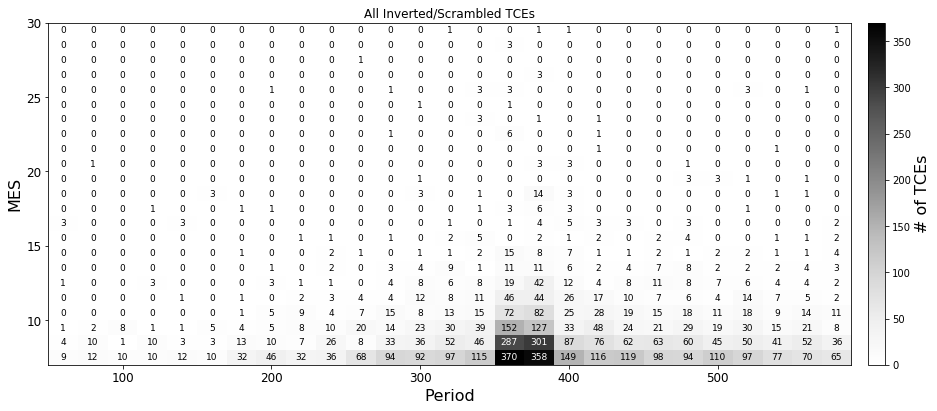

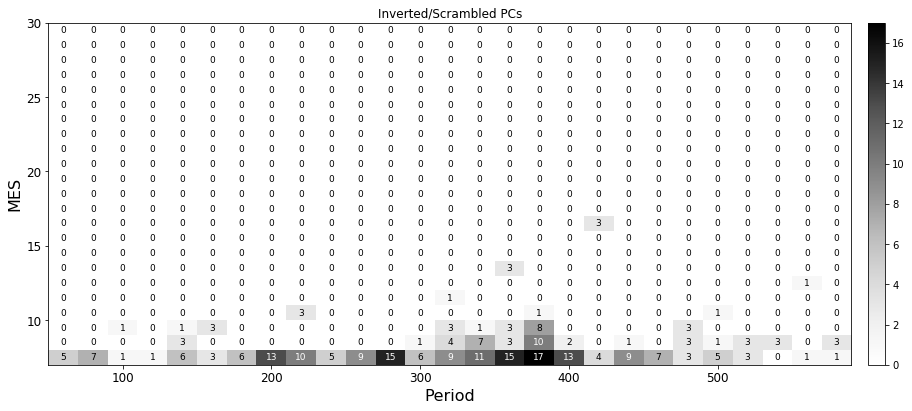

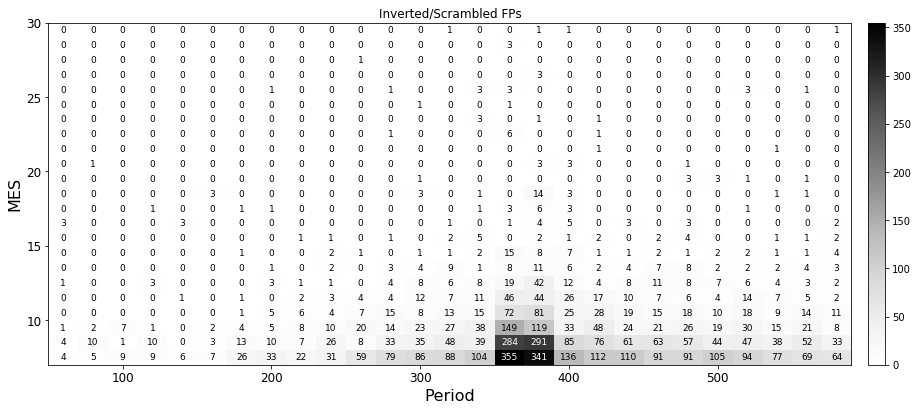

In [13]:
dPeriod = 20; 
dMes = 1;

p0 = periodMin;
pEnd = periodMax;
m0 = mesMin;
mEnd = mesMax;

# make the period-mes grid
NPeriod = int((pEnd - p0)/dPeriod);
NMes = int((mEnd - m0)/dMes);
tceGrid = np.zeros((NPeriod,NMes));
cellPeriod = np.zeros((NPeriod,NMes));
cellMes = np.zeros((NPeriod,NMes));
pcGrid = np.zeros((NPeriod,NMes));
fpGrid = np.zeros((NPeriod,NMes));

# count how many points are in each cell
for p in range(NPeriod):
    for m in range(NMes):
        cellPeriod[(p,m)] = p0 + p*dPeriod;
        cellMes[(p,m)] = m0 + m*dMes;
        pointsInCell = np.where(
            (spSyntheticTrueFps['period'] > cellPeriod[(p,m)]) 
            & (spSyntheticTrueFps['period'] <= cellPeriod[(p,m)]+dPeriod) 
            & (spSyntheticTrueFps['MES'] > cellMes[(p,m)]) 
            & (spSyntheticTrueFps['MES'] <= cellMes[(p,m)]+dMes));
        tceGrid[(p,m)] = len(pointsInCell[0]);

        pointsInCell = np.where(
            (spSyntheticPcs['period'] > cellPeriod[(p,m)]) 
            & (spSyntheticPcs['period'] <= cellPeriod[(p,m)]+dPeriod) 
            & (spSyntheticPcs['MES'] > cellMes[(p,m)]) 
            & (spSyntheticPcs['MES'] <= cellMes[(p,m)]+dMes));
        pcGrid[(p,m)] = len(pointsInCell[0]);

        pointsInCell = np.where(
            (spSyntheticFps['period'] > cellPeriod[(p,m)]) 
            & (spSyntheticFps['period'] <= cellPeriod[(p,m)]+dPeriod) 
            & (spSyntheticFps['MES'] > cellMes[(p,m)]) 
            & (spSyntheticFps['MES'] <= cellMes[(p,m)]+dMes));
        fpGrid[(p,m)] = len(pointsInCell[0]);

        
drawHeatMap(tceGrid, (15,15), cellPeriod, cellMes, colorBarLabel="# of TCEs");           
plt.ylabel('MES', fontsize = 16);
plt.xlabel('Period', fontsize = 16);
plt.savefig(outputDir + "fpEffNTces.pdf",bbox_inches='tight')
plt.title("All Inverted/Scrambled TCEs");
drawHeatMap(pcGrid, (15,15), cellPeriod, cellMes);           
plt.title("Inverted/Scrambled PCs");
plt.ylabel('MES', fontsize = 16);
plt.xlabel('Period', fontsize = 16);
drawHeatMap(fpGrid, (15,15), cellPeriod, cellMes);           
plt.title("Inverted/Scrambled FPs");
plt.ylabel('MES', fontsize = 16);
plt.xlabel('Period', fontsize = 16);


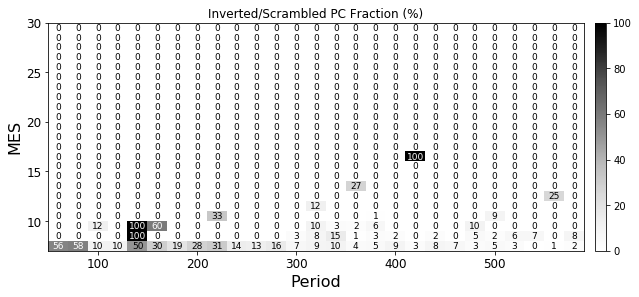

In [14]:
minTcePerCell = 0;

pcFrac = np.zeros(np.shape(tceGrid))
pcFrac[tceGrid>minTcePerCell] = pcGrid[tceGrid>minTcePerCell]/tceGrid[tceGrid>minTcePerCell];
drawHeatMap(np.round(100*pcFrac), (10,10), cellPeriod, cellMes);           
plt.title("Inverted/Scrambled PC Fraction (%)");
plt.ylabel('MES', fontsize = 16);
plt.xlabel('Period', fontsize = 16);


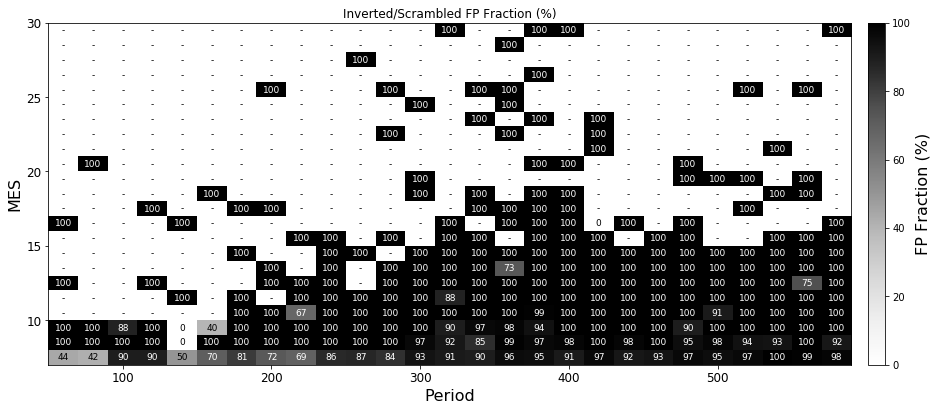

In [15]:
fpFrac = np.zeros(np.shape(tceGrid))
fpFrac[tceGrid>minTcePerCell] = fpGrid[tceGrid>minTcePerCell]/tceGrid[tceGrid>minTcePerCell];
drawHeatMap(np.round(100*fpFrac), (15,15), cellPeriod, cellMes, colorBarLabel="FP Fraction (%)", nData = tceGrid);           
plt.ylabel('MES', fontsize = 16);
plt.xlabel('Period', fontsize = 16);
plt.savefig(outputDir + "fpEffFPFrac.pdf",bbox_inches='tight')
plt.title("Inverted/Scrambled FP Fraction (%)");


In [16]:
cFp = fpGrid.flatten();
nTce = tceGrid.flatten();

# convert to homogeneous coordinates on unit square [0,1]
cellX, cellY = funcModels.normalizeRange(cellPeriod, cellMes, [periodMin, periodMax], [mesMin, mesMax]);
gridShape = np.shape(cellX);
dx = 1./gridShape[0];
dy = 1./gridShape[1];
print("gridShape = " + str(gridShape) + ", dx = " + str(dx) + ", dy = " + str(dy))

cellXFlat = cellX.flatten();
cellYFlat = cellY.flatten();

cFp[nTce<minTcePerCell] = 0;
nTce[nTce<minTcePerCell] = 0;



gridShape = (27, 23), dx = 0.037037037037, dy = 0.0434782608696


Now prepare the obsFP data

In [17]:
if dataType == "dr25":
    obsTceList = dataLoc + "kplr_dr25_obs_tces.txt"
else:
    obsTceList = dataLoc + "kplr_dr25_obs_" + dataType + "_tces.txt"

obsTcesFull = ascii.read(obsTceList);
obsTcesFullPd = obsTcesFull.to_pandas();


In [18]:
bannedTCEList = ascii.read(dataLoc + "kplr_droplist_inv.txt");
bannedTCEList = bannedTCEList.to_pandas();

obsTcesPd = obsTcesFullPd[~obsTcesFullPd['TCE_ID'].isin(bannedTCEList['TCE_ID'])];

print("length of obsTcesFull = " + str(len(obsTcesFullPd)) 
      + ", length of obsTces = " + str(len(obsTcesPd)))

length of obsTcesFull = 32530, length of obsTces = 29130


In [19]:
kicKepids = pd.DataFrame(kic.kepid)
obsTcesPd = pd.merge(obsTcesPd, kicKepids, left_on="KIC", right_on="kepid", how="inner")

In [20]:
print("length of kic = " + str(len(kic.kepid)))
print("length of unique kic = " + str(len(np.unique(kic.kepid))))
print("length of obsTces = " + str(len(obsTcesPd.KIC)))
print("length of unique obsTces = " + str(len(np.unique(obsTcesPd.KIC))))


length of kic = 58974
length of unique kic = 58974
length of obsTces = 3667
length of unique obsTces = 2928


In [21]:
obsTces = Table.from_pandas(obsTcesPd)

In [22]:
spIndex = np.where(np.all([
    obsTces['Rp']>rpMin,obsTces['Rp']<rpMax,\
    obsTces['period']>periodMin,obsTces['period']<periodMax], axis=0))
spObsTces = obsTces[spIndex]

print("length of spObsTces = " + str(len(spObsTces)))

length of spObsTces = 1735


In [23]:
spObsNtlPcs = spObsTces[(spObsTces['NTL']==0) & (spObsTces['Score']>=scoreCut)]
spObsNtlFps = spObsTces[(spObsTces['NTL']==1) | (spObsTces['Score']<scoreCut)]

spObsPcs = spObsTces[(spObsTces['Disp']=='PC') & (spObsTces['Score']>=scoreCut)]
spObsFps = spObsTces[(spObsTces['Disp']=='FP') | (spObsTces['Score']<scoreCut)]

print("length of spObsNtlPcs = " + str(len(spObsNtlPcs)))
print("length of spObsNtlFps = " + str(len(spObsNtlFps)))

print("length of obsPcs = " + str(len(spObsPcs)))
print("length of obsFps = " + str(len(spObsFps)))


length of spObsNtlPcs = 296
length of spObsNtlFps = 1439
length of obsPcs = 271
length of obsFps = 1464


In [24]:
spObsFpsNotNtl = spObsFps[(spObsFps['NTL']==0)]
spObsFpsNtl = spObsFps[(spObsFps['NTL']==1)]

print("length of spObsFpsNotNtl = " + str(len(spObsFpsNotNtl)))
print("length of spObsFpsNtl = " + str(len(spObsFpsNtl)))


length of spObsFpsNotNtl = 25
length of spObsFpsNtl = 1439


In [25]:
spObsFpsNotNtlId = spObsFpsNotNtl["TCE_ID"]
spObsFpsNotNtlId

001718189-03
002716853-02
003531231-01
003531231-02
003644653-02
003966912-02
004150539-03
005350447-01
005350447-02
005551228-01
005806800-01


In [26]:
# list of obs FPs with NTL=0 that may still be artifacts from visual inspection
# the record of the visual inspection is in obsFpsNotNtlId.txt
obsNoNtlFAs = ["002716853-02", "004371172-01", "004557341-01", "009394762-01", "011401822-02"]
# remove these from the obs FPs with NTL = 0 to create list of astrophysical FPs
spObsFpsNotNtlPd = spObsFpsNotNtl.to_pandas()
spObsFpsNotNtlAfpPd = spObsFpsNotNtlPd[~spObsFpsNotNtlPd['TCE_ID'].isin(obsNoNtlFAs)]

# remove the obs FPs with NTL=0 that are judged to be artifacts from visual inspection
spObsFpsPd = spObsFps.to_pandas();
spObsFpsPd = spObsFpsPd[~spObsFpsPd['TCE_ID'].isin(spObsFpsNotNtlAfpPd['TCE_ID'])]
spObsFps = Table.from_pandas(spObsFpsPd)

print("length of obsFps = " + str(len(spObsFps)))



length of obsFps = 1441


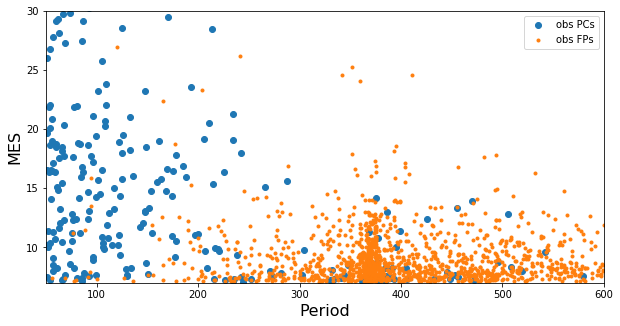

In [27]:
plt.figure(figsize=(10,5));
# plt.subplot(2,2,1);
plt.plot(spObsPcs['period'], spObsPcs['MES'], "o",
        spObsFps['period'], spObsFps['MES'], ".");
plt.ylim(mesMin,mesMax);
plt.xlim(periodMin,periodMax);
plt.legend(("obs PCs", "obs FPs"));
plt.ylabel('MES', fontsize = 16);
plt.xlabel('Period', fontsize = 16);


In [28]:
obsTceGrid = np.zeros((NPeriod,NMes));
obsFpGrid = np.zeros((NPeriod,NMes));
obsPcGrid = np.zeros((NPeriod,NMes));
# count how many points are in each cell
for p in range(NPeriod):
    for m in range(NMes):
        pointsInCell = np.where(
            (spObsTces['period'] > cellPeriod[(p,m)]) 
            & (spObsTces['period'] <= cellPeriod[(p,m)]+dPeriod) 
            & (spObsTces['MES'] > cellMes[(p,m)]) 
            & (spObsTces['MES'] <= cellMes[(p,m)]+dMes));
        obsTceGrid[(p,m)] = len(pointsInCell[0]);

        pointsInCell = np.where(
            (spObsPcs['period'] > cellPeriod[(p,m)]) 
            & (spObsPcs['period'] <= cellPeriod[(p,m)]+dPeriod) 
            & (spObsPcs['MES'] > cellMes[(p,m)]) 
            & (spObsPcs['MES'] <= cellMes[(p,m)]+dMes));
        obsPcGrid[(p,m)] = len(pointsInCell[0]);

        pointsInCell = np.where(
            (spObsFps['period'] > cellPeriod[(p,m)]) 
            & (spObsFps['period'] <= cellPeriod[(p,m)]+dPeriod) 
            & (spObsFps['MES'] > cellMes[(p,m)]) 
            & (spObsFps['MES'] <= cellMes[(p,m)]+dMes));
        obsFpGrid[(p,m)] = len(pointsInCell[0]);


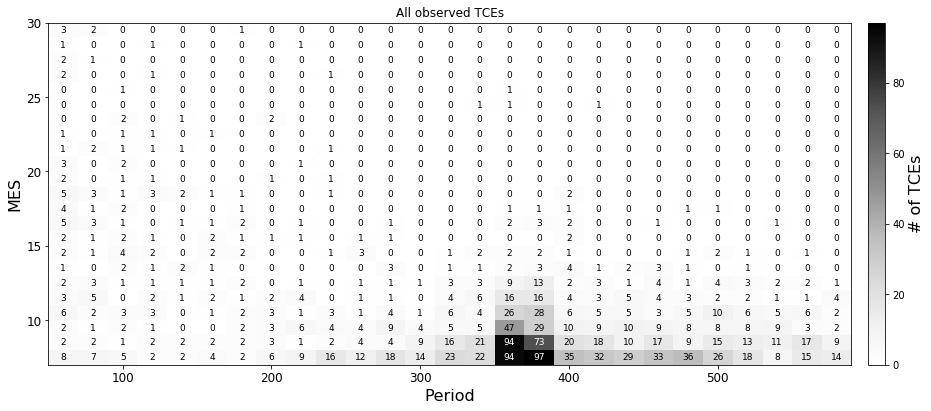

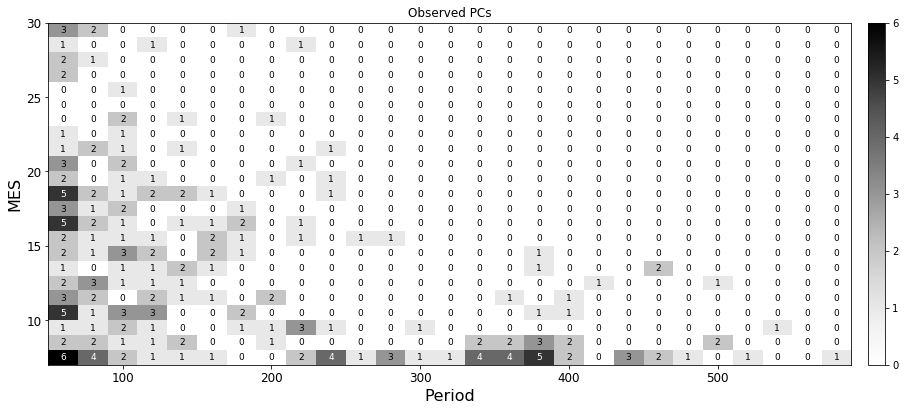

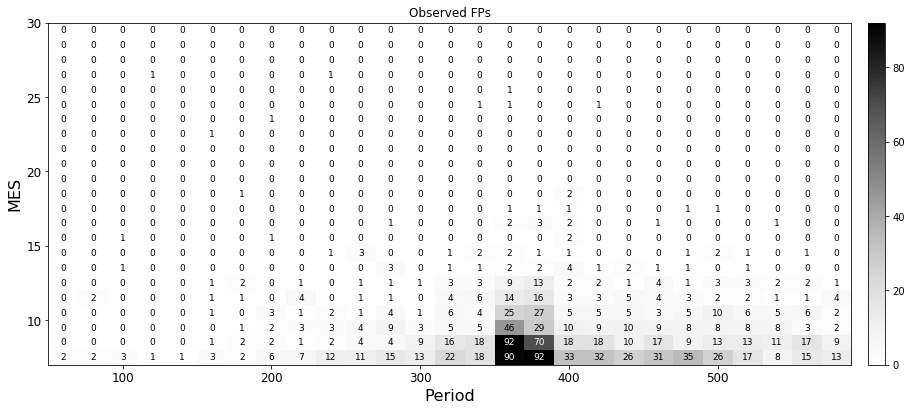

In [29]:
drawHeatMap(obsTceGrid, (15,15), cellPeriod, cellMes, colorBarLabel="# of TCEs");           
plt.ylabel('MES', fontsize = 16);
plt.xlabel('Period', fontsize = 16);
plt.savefig(outputDir + "obsFPNTces.pdf",bbox_inches='tight')
plt.title("All observed TCEs");
drawHeatMap(obsPcGrid, (15,15), cellPeriod, cellMes);           
plt.title("Observed PCs");
plt.ylabel('MES', fontsize = 16);
plt.xlabel('Period', fontsize = 16);
drawHeatMap(obsFpGrid, (15,15), cellPeriod, cellMes);           
plt.title("Observed FPs");
plt.ylabel('MES', fontsize = 16);
plt.xlabel('Period', fontsize = 16);



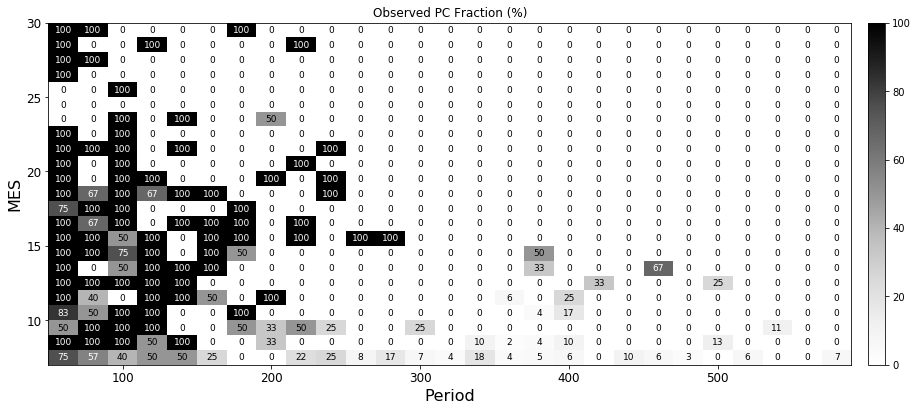

In [30]:
minTcePerCell = 0;

obsPcFrac = np.zeros(np.shape(obsTceGrid))
obsPcFrac[obsTceGrid>minTcePerCell] = obsPcGrid[obsTceGrid>minTcePerCell]/obsTceGrid[obsTceGrid>minTcePerCell];
drawHeatMap(np.round(100*obsPcFrac), (15,15), cellPeriod, cellMes);           
plt.title("Observed PC Fraction (%)");
plt.ylabel('MES', fontsize = 16);
plt.xlabel('Period', fontsize = 16);


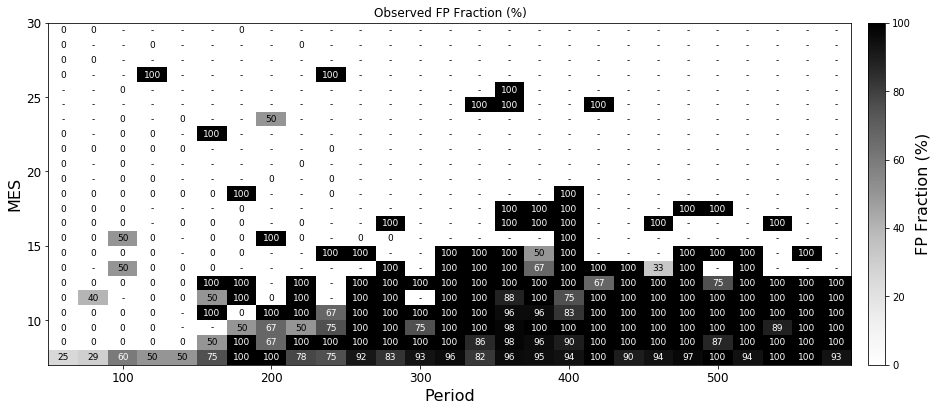

In [31]:
obsFpFrac = np.zeros(np.shape(obsTceGrid))
obsFpFrac[obsTceGrid>minTcePerCell] = obsFpGrid[obsTceGrid>minTcePerCell]/obsTceGrid[obsTceGrid>minTcePerCell];
drawHeatMap(np.round(100*obsFpFrac), (15,15), cellPeriod, cellMes, colorBarLabel="FP Fraction (%)", nData = obsTceGrid);           
plt.ylabel('MES', fontsize = 16);
plt.xlabel('Period', fontsize = 16);
plt.savefig(outputDir + "obsFPFrac.pdf",bbox_inches='tight')
plt.title("Observed FP Fraction (%)");


In [32]:
cObsFp = obsFpGrid.flatten();
nObsTce = obsTceGrid.flatten();


In [33]:
tceData = [cellXFlat, cellYFlat, nTce, cFp, nObsTce, cObsFp];


In [34]:
# theta now contains two concatenated parameter vectors 
# the first is for the FP Effectiveness model
# the second is for the Obs FP rate model
# We assume both models use the rotatedLogisticX0 function, which has 4 parameters
# so the FPE model is theta[0:3] and the ObsFP model is theta[4:7]

def lnBinlike1(theta, data, fpeModel, obsFpModel):
    x, y, nFpe, cFpe, nObsFp, cObsFp = data
    nFpeParams = len(funcModels.initRateModel(fpeModel));
    fpeTheta = theta[0:nFpeParams]
    obsFpTheta = theta[nFpeParams:]
    rFpe = funcModels.rateModel(x,y,fpeTheta,fpeModel);
    rObsFp = funcModels.rateModel(x,y,obsFpTheta,obsFpModel);

    return lnBinlike(data, rFpe, rObsFp)

def lnBinlike(data, rFpe, rObsFp):
    x, y, nFpe, cFpe, nObsFp, cObsFp = data
    
    clnrFpe = cFpe*np.log(rFpe);
    clnrFpe[cFpe==0] = 0;
    
    clnrObsFp = cObsFp*np.log(rObsFp);
    clnrObsFp[cObsFp==0] = 0;
    
    # the log likelihood is the sum because the FPE and ObsFP models are independent
    lpl = np.sum(np.log(spec.comb(nFpe,cFpe)) + clnrFpe + (nFpe-cFpe)*np.log(1-rFpe)) \
    + np.sum(np.log(spec.comb(nObsFp,cObsFp)) + clnrObsFp + (nObsFp-cObsFp)*np.log(1-rObsFp));
        
    return lpl

def lnBinprior(theta, rFpe, rObsFp, fpeModel, obsFpModel):
    R = 1 - (rObsFp/(1-rObsFp))*((1-rFpe)/rFpe);

    nFpeParams = len(funcModels.initRateModel(fpeModel));
    fpeTheta = theta[0:nFpeParams]
    obsFpTheta = theta[nFpeParams:]

    # print(theta)
    inPrior = True   
    
    if fpeModel == "constant":
        if 0 <= fpeTheta[0] <= 1:
            inPrior = True
        else:
            return -np.inf
    elif fpeModel == "rotatedLogisticX0":
        if -1 <= fpeTheta[0] <= 2 and 1e-4 < fpeTheta[1] < 100 and 0 < fpeTheta[2] <= 1  and -180 < fpeTheta[3] < 180:
            inPrior = True
        else:
            return -np.inf
    else:
        raise ValueError('lnBinprior fpeModel: Bad model name');
    
    if obsFpModel == "rotatedLogisticX0":
        if -1 <= obsFpTheta[0] <= 2 and 1e-4 < obsFpTheta[1] < 100 and 0 < obsFpTheta[2] <= 1  and -180 < obsFpTheta[3] < 180:
            inPrior = True
        else:
            return -np.inf
    else:
        raise ValueError('Bad model name');

    if np.min(rFpe) >= 0 and np.max(rFpe) <= 1 \
    and np.min(rObsFp) >= 0 and np.max(rObsFp) <= 1 \
    and np.min(R) >= 0 and np.max(R) <= 1:
        inPrior = True
    else:
        return -np.inf
        
    # successfully passed all priors
    return 1.0

def lnBinprob(theta, data, fpeModel, obsFpModel):
    x, y, nFpe, cFpe, nObsFp, cObsFp = data
    nFpeParams = len(funcModels.initRateModel(fpeModel));
    fpeTheta = theta[0:nFpeParams]
    obsFpTheta = theta[nFpeParams:]
    rFpe = funcModels.rateModel(x,y,fpeTheta,fpeModel);
    rObsFp = funcModels.rateModel(x,y,obsFpTheta,obsFpModel);

    lp = lnBinprior(theta, rFpe, rObsFp, fpeModel, obsFpModel)
    # print("lnPoisprior = " + str(lp))
    if not np.isfinite(lp):
        return -np.inf
    # print(str(lnPoislike(theta, A, c)))
    return lp + lnBinlike(data, rFpe, rObsFp)


In [35]:
fpeModel = "rotatedLogisticX0"
obsFpModel = "rotatedLogisticX0"

if fpeModel == "constant":
    initialPos = [ 0.98 ];
elif fpeModel == "rotatedLogisticX0":
    # starting point that satisfies the prior
    initialPos = [ 1.32902263,    9.1711484 ,    0.99954986,   98.23503845];
else:
    raise ValueError('fpeModel not defined');

if obsFpModel == "rotatedLogisticX0":
    # starting point that satisfies the prior
    initialPos = initialPos + [ 0.64431069,   11.06074825,    0.95722414, -151.88778664];
else:
    raise ValueError('obsFpModel not defined');

print(initialPos)



[1.32902263, 9.1711484, 0.99954986, 98.23503845, 0.64431069, 11.06074825, 0.95722414, -151.88778664]


In [36]:
maxLikelihoodResult = initialPos;


In [37]:
import emcee

postName = outputDir + "jointPosteriors_" + str(fpeModel) + "_" + str(obsFpModel) + ".npy"
if path.exists(postName): 
    samples = np.load(postName)
    ndim = samples.shape[1]
else:
    ndim, nwalkers = len(maxLikelihoodResult), 100
    pos = [maxLikelihoodResult + 1e-3*np.random.randn(ndim) for i in range(nwalkers)]
    sampler = emcee.EnsembleSampler(nwalkers, ndim, lnBinprob, args=(tceData, fpeModel, obsFpModel))


    sampler.run_mcmc(pos, 10000);

    samples = sampler.chain[:, 5000:, :].reshape((-1, ndim))
    np.save(outputDir + "jointPosteriors_" + str(fpeModel) + "_" + str(obsFpModel) + ".npy", samples)

    
dataResult = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
                             zip(*np.percentile(samples, [16, 50, 84],
                                                axis=0)))
dataResult = list(dataResult)




/Users/steve/anaconda3/envs/py2/lib/python2.7/site-packages/emcee/ensemble.py:335: RuntimeWarning: invalid value encountered in subtract
  lnpdiff = (self.dim - 1.) * np.log(zz) + newlnprob - lnprob0
/Users/steve/anaconda3/envs/py2/lib/python2.7/site-packages/emcee/ensemble.py:336: RuntimeWarning: invalid value encountered in greater
  accept = (lnpdiff > np.log(self._random.rand(len(lnpdiff))))


MCMC $x_0$:=1.104+0.032-0.028
MCMC $k_x$:=26.111+11.392-7.017
MCMC $A$:=0.981+0.004-0.004
MCMC $\phi$:=102.828+4.053-3.475
MCMC $x_0$:=0.679+0.028-0.030
MCMC $k_x$:=11.650+1.048-0.896
MCMC $A$:=0.957+0.006-0.007
MCMC $\phi$:=-163.846+3.883-3.944
fitTheta = [   1.10368267   26.1108557     0.9806904   102.82780656    0.67861079
   11.65046169    0.95712018 -163.84566616]


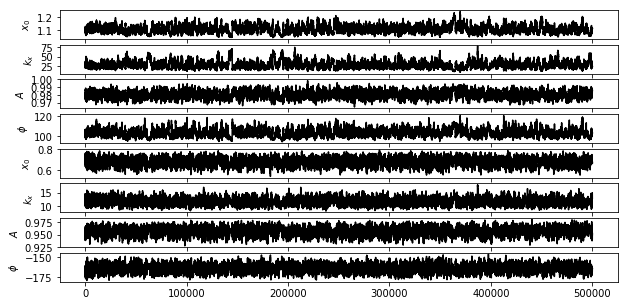

In [38]:
modelLabels = funcModels.getModelLabels(fpeModel) + funcModels.getModelLabels(obsFpModel)
for i in range(0,ndim):
    v = dataResult[i];    
    print("MCMC " + modelLabels[i] + ":={:.3f}".format(v[0]) + "+{:.3f}".format(v[1]) + "-{:.3f}".format(v[2]))
    # print("true " + modelLabels[i] + ":={:.3f}".format(trueTheta[i]))
# print("compared to: rate={:.3f}".format(rate))

resultSize = np.shape(dataResult);
fitTheta = np.zeros(resultSize[0]);
for i in range(resultSize[0]):
    fitTheta[i] = dataResult[i][0]
print("fitTheta = " + str(fitTheta))

plt.figure(figsize=(10,5))
for i in range(0,ndim):
    plt.subplot(ndim,1,i+1)
    plt.plot(np.transpose(samples[:, i]), color="k");
    plt.ylabel(modelLabels[i]);



In [39]:
from ipywidgets import FloatProgress
# search through the posteriors to find an initial position that satisfies 0 <= R <= 1
if False:
    f = FloatProgress(min=0, max=np.shape(samples)[0])
    display(f)

    # np.shape(samples) = (500000, 8)
    minR = np.zeros(np.shape(samples)[0]);
    maxR = np.zeros(np.shape(samples)[0]);
    nFpeParams = len(funcModels.initRateModel(fpeModel));
    for i in range(np.shape(samples)[0]):
        fpe = funcModels.rateModel(cellXFlat, cellYFlat, samples[i,0:nFpeParams],fpeModel);
        ofp = funcModels.rateModel(cellXFlat, cellYFlat, samples[i,nFpeParams:],obsFpModel);
        R = 1 - (ofp/(1-ofp))*((1-fpe)/fpe);
        minR[i] = np.min(R);
        maxR[i] = np.max(R);

        f.value += 1

    goodi = np.where((minR >= 0) & (maxR <= 1))
    print("largest max(minR) = " + str(np.max(minR)) + " at " + str(np.argmax(minR)))
    samples[np.argmax(minR),:]

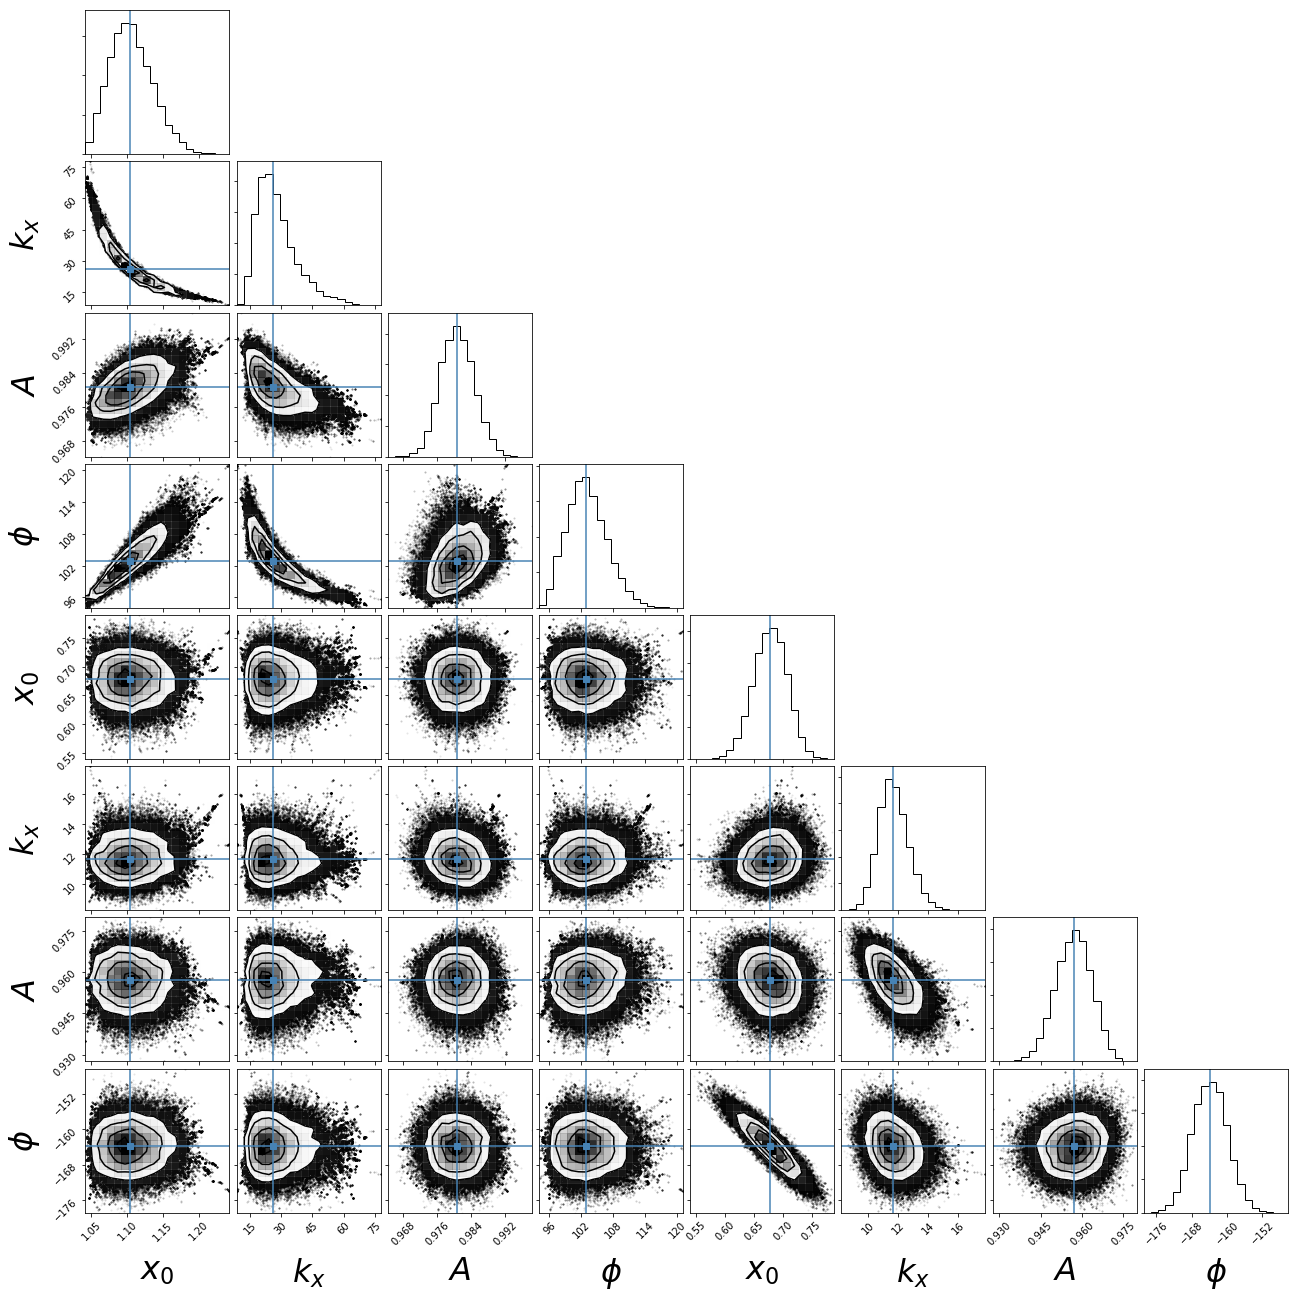

In [40]:
import corner
modelLabels = funcModels.getModelLabels(fpeModel) + funcModels.getModelLabels(obsFpModel)

fig = corner.corner(samples, labels = modelLabels, label_kwargs = {"fontsize": 32}, truths = fitTheta)
plt.savefig(outputDir + "fpEffPost.pdf",bbox_inches='tight')


In [41]:
nFpeParams = len(funcModels.initRateModel(fpeModel));
fitThetaFPE = fitTheta[0:nFpeParams];
fpFitTheta = fitTheta[nFpeParams:];

Test the FPE model

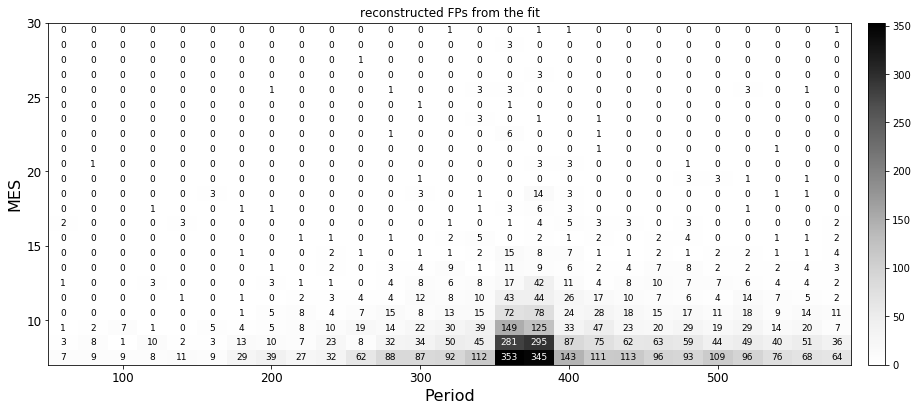

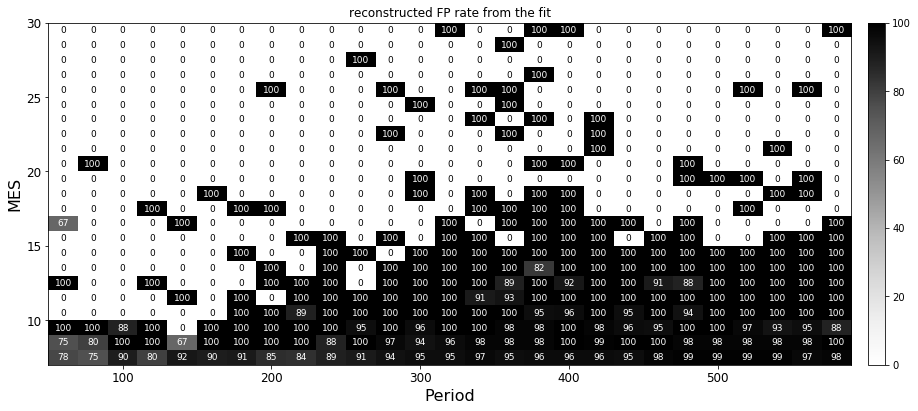

In [42]:
fitGrid = np.zeros(np.shape(tceGrid));

for p in range(NPeriod):
    for m in range(NMes):
        fitGrid[(p,m)] = np.random.binomial(tceGrid[(p,m)], 
            funcModels.rateModel(cellX[(p,m)]+dx/2, cellY[(p,m)]+dx/2, fitThetaFPE, fpeModel), 1);
        
drawHeatMap(fitGrid, (15,15), cellPeriod, cellMes);
plt.title('reconstructed FPs from the fit');
plt.ylabel('MES', fontsize = 16);
plt.xlabel('Period', fontsize = 16);

fitFrac = np.zeros(np.shape(tceGrid))
fitFrac[tceGrid>minTcePerCell] = fitGrid[tceGrid>minTcePerCell]/tceGrid[tceGrid>minTcePerCell];
drawHeatMap(np.round(100*fitFrac), (15,15), cellPeriod, cellMes);           
plt.title('reconstructed FP rate from the fit');
plt.ylabel('MES', fontsize = 16);
plt.xlabel('Period', fontsize = 16);


In [43]:
nFits = 1000;
fitGrid = np.zeros([np.shape(tceGrid)[0],np.shape(tceGrid)[1],nFits]);
sidx = [0]*nFits
progress = FloatProgress(min=0, max=nFits)
display(progress)

nFpeParams = len(funcModels.initRateModel(fpeModel));
for f in range(nFits):
    sidx[f] = int(np.random.uniform(high=samples.shape[0]-1));
    tTheta = samples[sidx[f],0:nFpeParams]

    for p in range(NPeriod):
        for m in range(NMes):
            rm = funcModels.rateModel(cellX[(p,m)]+dx/2, cellY[(p,m)]+dy/2, tTheta, fpeModel)
            if rm > 1:
                rm = 1;
            fitGrid[(p,m,f)] = np.random.binomial(tceGrid[(p,m)], rm, 1);
    progress.value += 1
    
meanFpeFit = np.mean(fitGrid, 2)
stdFpeFit = np.std(fitGrid, 2)



FloatProgress(value=0.0, max=1000.0)

In [44]:
fpeModel

'rotatedLogisticX0'

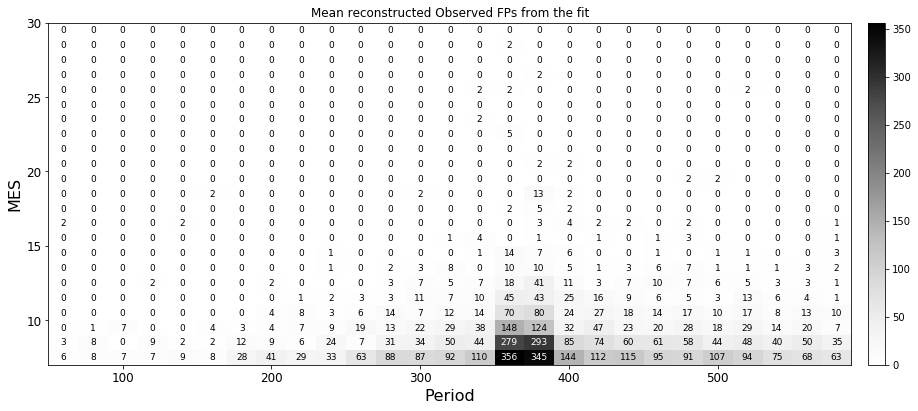

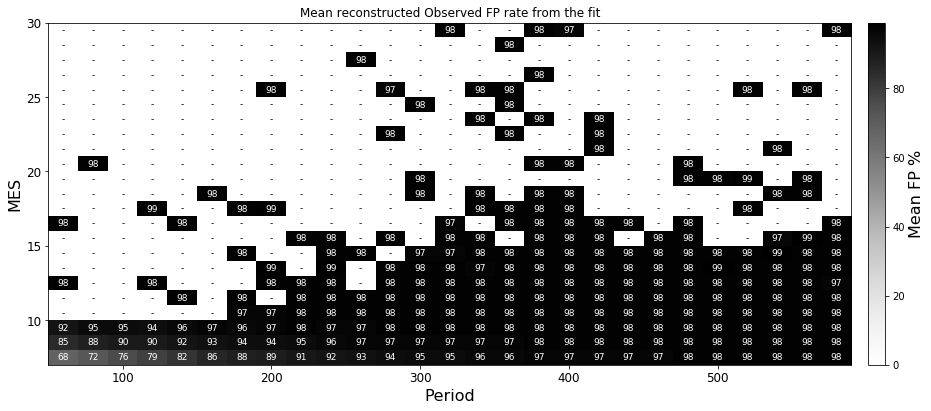

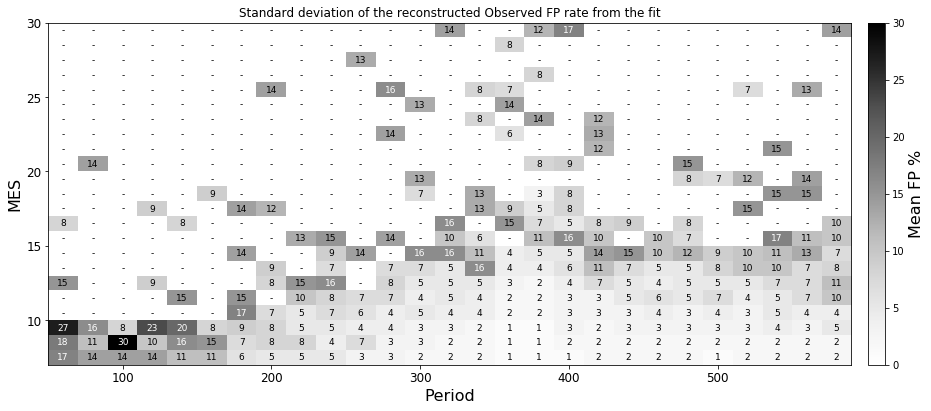

In [45]:
drawHeatMap(meanFpeFit, (15,15), cellPeriod, cellMes);           
plt.title("Mean reconstructed Observed FPs from the fit");
plt.ylabel('MES', fontsize = 16);
plt.xlabel('Period', fontsize = 16);

fitFracMean = np.zeros(np.shape(tceGrid))
fitFracMean[tceGrid>minTcePerCell] = meanFpeFit[tceGrid>minTcePerCell]/tceGrid[tceGrid>minTcePerCell];
drawHeatMap(np.round(100*fitFracMean), (15,15), cellPeriod, cellMes, nData = tceGrid, colorBarLabel="Mean FP %");           
plt.ylabel('MES', fontsize = 16);
plt.xlabel('Period', fontsize = 16);
plt.savefig(outputDir + "fpEffMean.pdf",bbox_inches='tight')
plt.title("Mean reconstructed Observed FP rate from the fit");

stdFrac = np.zeros(np.shape(tceGrid))
stdFrac[tceGrid>minTcePerCell] = stdFpeFit[tceGrid>minTcePerCell]/tceGrid[tceGrid>minTcePerCell];
drawHeatMap(np.round(100*stdFrac), (15,15), cellPeriod, cellMes, nData = tceGrid, colorBarLabel="Mean FP %");           
plt.ylabel('MES', fontsize = 16);
plt.xlabel('Period', fontsize = 16);
plt.savefig(outputDir + "fpEffStd.pdf",bbox_inches='tight')
plt.title("Standard deviation of the reconstructed Observed FP rate from the fit");


-0.06710242680926641

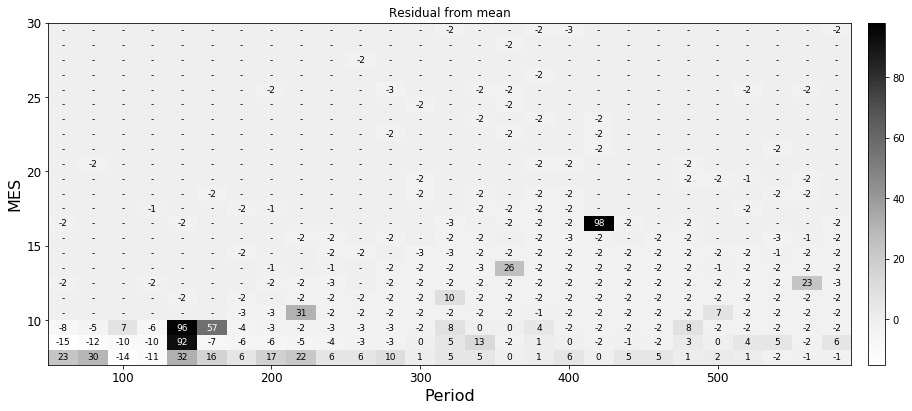

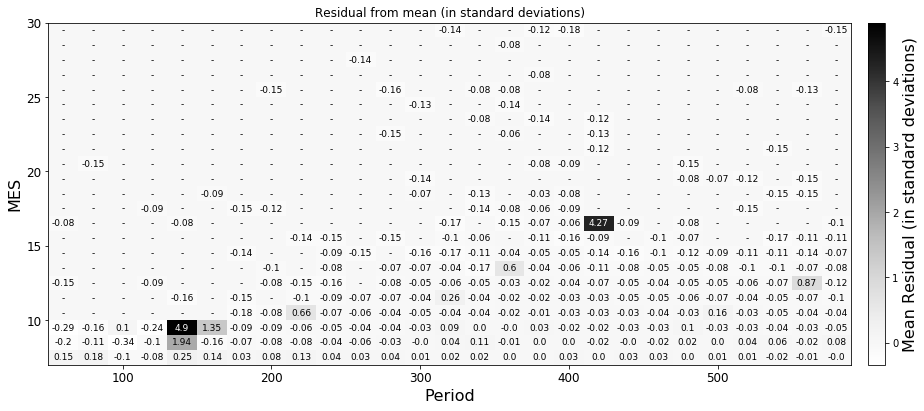

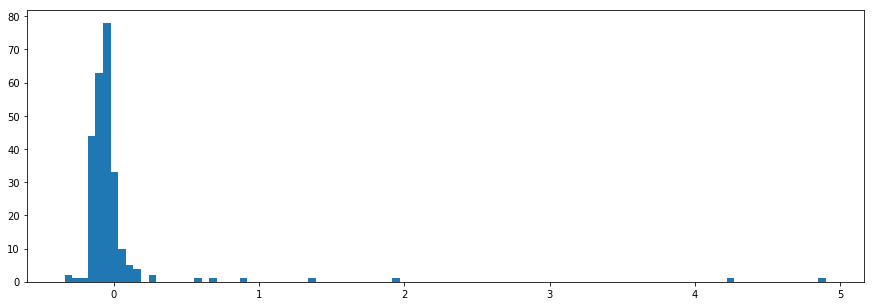

In [46]:
fitDiff = fitFracMean - fpFrac
fitDiffNorm =np.zeros(fitDiff.shape)
fitDiffNorm[stdFpeFit>0] = fitDiff[stdFpeFit>0]/stdFpeFit[stdFpeFit>0];

drawHeatMap(np.round(100*fitDiff), (15,15), cellPeriod, cellMes, nData = tceGrid);           
plt.title("Residual from mean");
plt.ylabel('MES', fontsize = 16);
plt.xlabel('Period', fontsize = 16);

drawHeatMap(np.round(fitDiffNorm, 2), (15,15), cellPeriod, cellMes, nData = tceGrid, 
            colorBarLabel="Mean Residual (in standard deviations)", forceInt = False); 
plt.ylabel('MES', fontsize = 16);
plt.xlabel('Period', fontsize = 16);
plt.savefig(outputDir + "fpEffMeanResid.pdf",bbox_inches='tight')
plt.title("Residual from mean (in standard deviations)");

plt.figure(figsize=(15,5));
plt.hist(fitDiffNorm.flatten()[nTce > 0], 100);

np.median(fitDiffNorm.flatten()[nTce > 0])


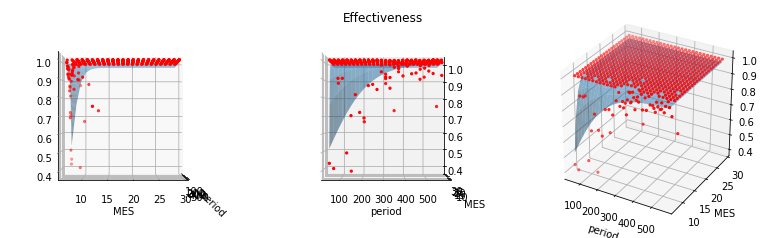

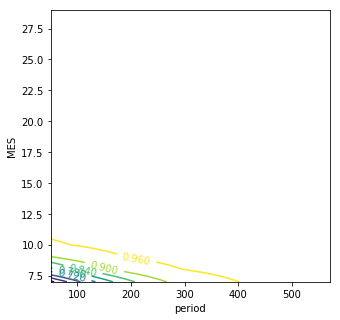

In [47]:
from mpl_toolkits.mplot3d import Axes3D  
from matplotlib import cm

fig = plt.figure(figsize=plt.figaspect(0.3));
ax = fig.add_subplot(1, 3, 1, projection='3d')
FPE = funcModels.rateModel(cellX, cellY, fitThetaFPE, fpeModel);
fpFracPlot = fpFrac
fpFrac[fpFrac == 0] = 1
surf = ax.plot_surface(cellPeriod, cellMes, FPE, alpha = 0.5);
scat = ax.scatter(cellPeriod, cellMes, fpFrac, c='r', marker = '.');
plt.xlabel("period");
plt.ylabel("MES");
ax.view_init(0,0)

ax = fig.add_subplot(1, 3, 2, projection='3d')
surf = ax.plot_surface(cellPeriod, cellMes, FPE, alpha = 0.5);
scat = ax.scatter(cellPeriod, cellMes, fpFrac, c='r', marker = '.');
plt.xlabel("period");
plt.ylabel("MES");
ax.view_init(0,-90)
plt.title("Effectiveness");

ax = fig.add_subplot(1, 3, 3, projection='3d')
surf = ax.plot_surface(cellPeriod, cellMes, FPE, alpha = 0.5);
scat = ax.scatter(cellPeriod, cellMes, fpFrac, c='r', marker = '.');
plt.xlabel("period");
plt.ylabel("MES");

fig, ax = plt.subplots(figsize=(5,5));
CS = ax.contour(cellPeriod, cellMes, FPE);
ax.clabel(CS, inline=1, fontsize=10);
plt.xlabel("period");
plt.ylabel("MES");


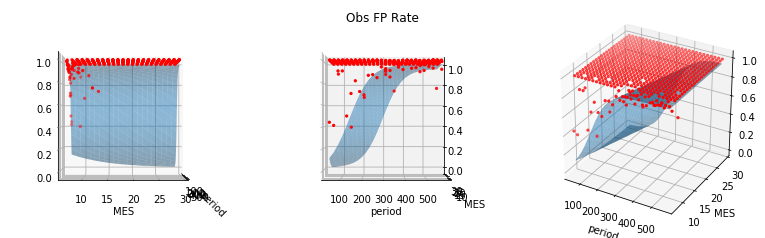

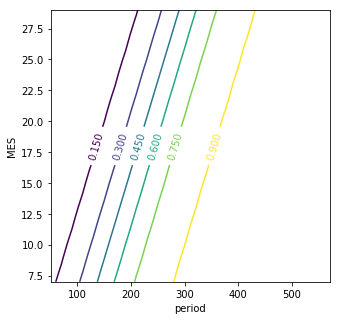

In [48]:
fig = plt.figure(figsize=plt.figaspect(0.3));
ax = fig.add_subplot(1, 3, 1, projection='3d')
OFP = funcModels.rateModel(cellX, cellY, fpFitTheta, obsFpModel);
fpFracPlot = fpFrac
fpFrac[fpFrac == 0] = 1
surf = ax.plot_surface(cellPeriod, cellMes, OFP, alpha = 0.5);
scat = ax.scatter(cellPeriod, cellMes, fpFrac, c='r', marker = '.');
plt.xlabel("period");
plt.ylabel("MES");
ax.view_init(0,0)

ax = fig.add_subplot(1, 3, 2, projection='3d')
surf = ax.plot_surface(cellPeriod, cellMes, OFP, alpha = 0.5);
scat = ax.scatter(cellPeriod, cellMes, fpFrac, c='r', marker = '.');
plt.xlabel("period");
plt.ylabel("MES");
ax.view_init(0,-90)
plt.title("Obs FP Rate");

ax = fig.add_subplot(1, 3, 3, projection='3d')
surf = ax.plot_surface(cellPeriod, cellMes, OFP, alpha = 0.5);
scat = ax.scatter(cellPeriod, cellMes, fpFrac, c='r', marker = '.');
plt.xlabel("period");
plt.ylabel("MES");

fig, ax = plt.subplots(figsize=(5,5));
CS = ax.contour(cellPeriod, cellMes, OFP);
ax.clabel(CS, inline=1, fontsize=10);
plt.xlabel("period");
plt.ylabel("MES");


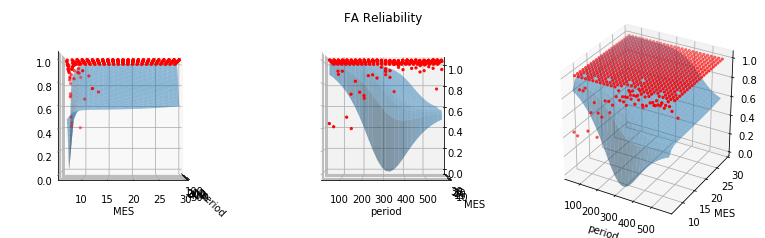

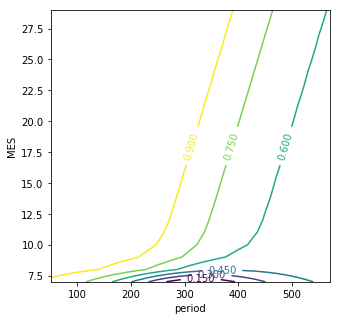

In [49]:
fig = plt.figure(figsize=plt.figaspect(0.3));
ax = fig.add_subplot(1, 3, 1, projection='3d')
R = 1 - (OFP/(1-OFP))*((1-FPE)/FPE);
fpFracPlot = fpFrac
fpFrac[fpFrac == 0] = 1
surf = ax.plot_surface(cellPeriod, cellMes, R, alpha = 0.5);
scat = ax.scatter(cellPeriod, cellMes, fpFrac, c='r', marker = '.');
plt.xlabel("period");
plt.ylabel("MES");
ax.view_init(0,0)

ax = fig.add_subplot(1, 3, 2, projection='3d')
surf = ax.plot_surface(cellPeriod, cellMes, R, alpha = 0.5);
scat = ax.scatter(cellPeriod, cellMes, fpFrac, c='r', marker = '.');
plt.xlabel("period");
plt.ylabel("MES");
ax.view_init(0,-90)
plt.title("FA Reliability");

ax = fig.add_subplot(1, 3, 3, projection='3d')
surf = ax.plot_surface(cellPeriod, cellMes, R, alpha = 0.5);
scat = ax.scatter(cellPeriod, cellMes, fpFrac, c='r', marker = '.');
plt.xlabel("period");
plt.ylabel("MES");

fig, ax = plt.subplots(figsize=(5,5));
CS = ax.contour(cellPeriod, cellMes, R);
ax.clabel(CS, inline=1, fontsize=10);
plt.xlabel("period");
plt.ylabel("MES");


Test the Obs FP rate model

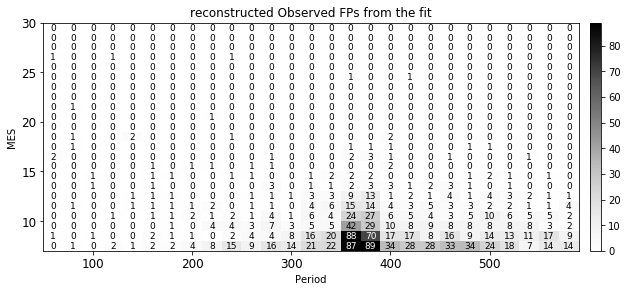

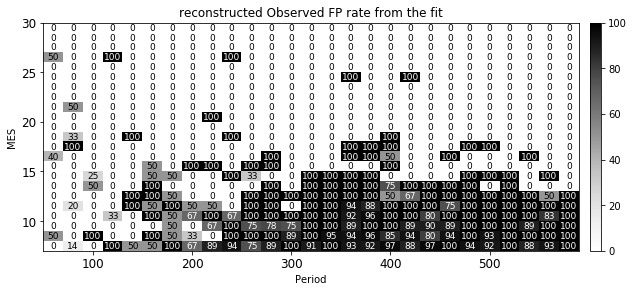

In [50]:
fitGrid = np.zeros(np.shape(obsTceGrid));

for p in range(NPeriod):
    for m in range(NMes):
        fitGrid[(p,m)] = np.random.binomial(obsTceGrid[(p,m)], 
            funcModels.rateModel(cellX[(p,m)]+dx/2, cellY[(p,m)]+dx/2, fpFitTheta, obsFpModel), 1);
        
drawHeatMap(fitGrid, (10,10), cellPeriod, cellMes);
plt.title('reconstructed Observed FPs from the fit');
plt.ylabel('MES');
plt.xlabel('Period');

fitFrac = np.zeros(np.shape(obsTceGrid))
fitFrac[obsTceGrid>minTcePerCell] = fitGrid[obsTceGrid>minTcePerCell]/obsTceGrid[obsTceGrid>minTcePerCell];
drawHeatMap(np.round(100*fitFrac), (10,10), cellPeriod, cellMes);           
plt.title('reconstructed Observed FP rate from the fit');
plt.ylabel('MES');
plt.xlabel('Period');


In [51]:
nFits = 1000;
fitGrid = np.zeros([np.shape(obsTceGrid)[0],np.shape(obsTceGrid)[1],nFits]);
sidx = [0]*nFits
progress = FloatProgress(min=0, max=nFits)
display(progress)

nFpeParams = len(funcModels.initRateModel(fpeModel));
for f in range(nFits):
    sidx[f] = int(np.random.uniform(high=samples.shape[0]-1));
    tTheta = samples[sidx[f],nFpeParams:]

    for p in range(NPeriod):
        for m in range(NMes):
            rm = funcModels.rateModel(cellX[(p,m)]+dx/2, cellY[(p,m)]+dy/2, tTheta, obsFpModel)
            if rm > 1:
                rm = 1;
            fitGrid[(p,m,f)] = np.random.binomial(obsTceGrid[(p,m)], rm, 1);
    progress.value += 1
    
meanObsFit = np.mean(fitGrid, 2)
stdObsFit = np.std(fitGrid, 2)



FloatProgress(value=0.0, max=1000.0)

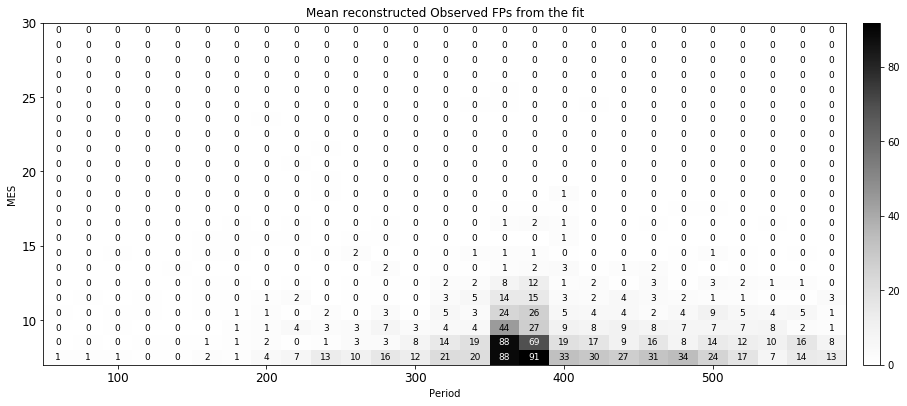

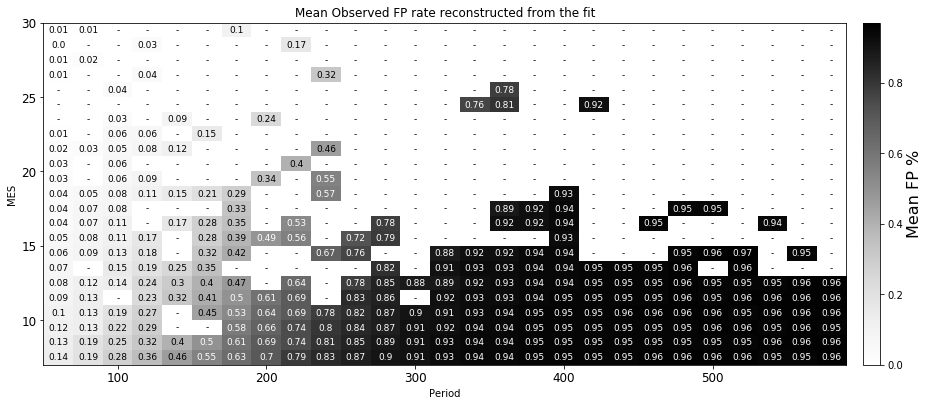

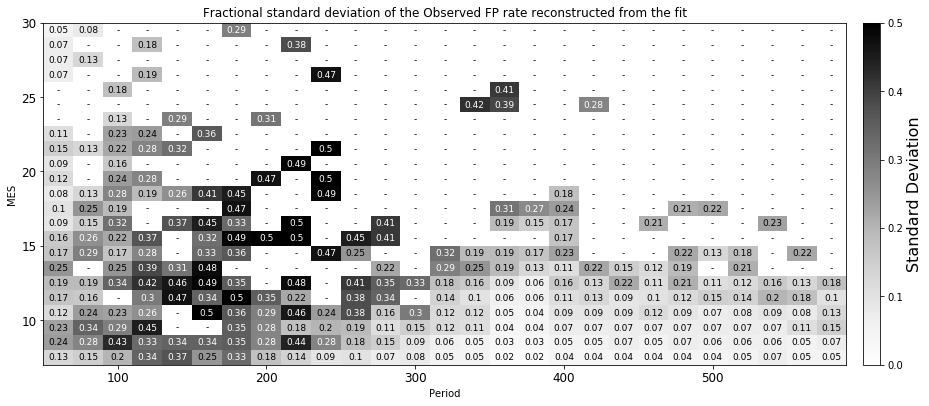

In [52]:
drawHeatMap(meanObsFit, (15,15), cellPeriod, cellMes);           
plt.title("Mean reconstructed Observed FPs from the fit");
plt.ylabel('MES');
plt.xlabel('Period');

fitFracMean = np.zeros(np.shape(obsTceGrid))
fitFracMean[obsTceGrid>minTcePerCell] = meanObsFit[obsTceGrid>minTcePerCell]/obsTceGrid[obsTceGrid>minTcePerCell];
drawHeatMap(np.round(fitFracMean, 2), (15,15), cellPeriod, cellMes, 
            nData = obsTceGrid, colorBarLabel="Mean FP %", forceInt=False);           
plt.ylabel('MES');
plt.xlabel('Period');
plt.savefig(outputDir + "obsFPMean.pdf",bbox_inches='tight')
plt.title("Mean Observed FP rate reconstructed from the fit");

stdFrac = np.zeros(np.shape(obsTceGrid))
stdFrac[obsTceGrid>minTcePerCell] = stdObsFit[obsTceGrid>minTcePerCell]/obsTceGrid[obsTceGrid>minTcePerCell];
drawHeatMap(np.round(stdFrac, 2), (15,15), cellPeriod, cellMes, 
            nData = obsTceGrid, colorBarLabel="Standard Deviation", forceInt=False);           
plt.ylabel('MES');
plt.xlabel('Period');
plt.savefig(outputDir + "obsFPStd.pdf",bbox_inches='tight')
plt.title("Fractional standard deviation of the Observed FP rate reconstructed from the fit");


-0.05306294645685328

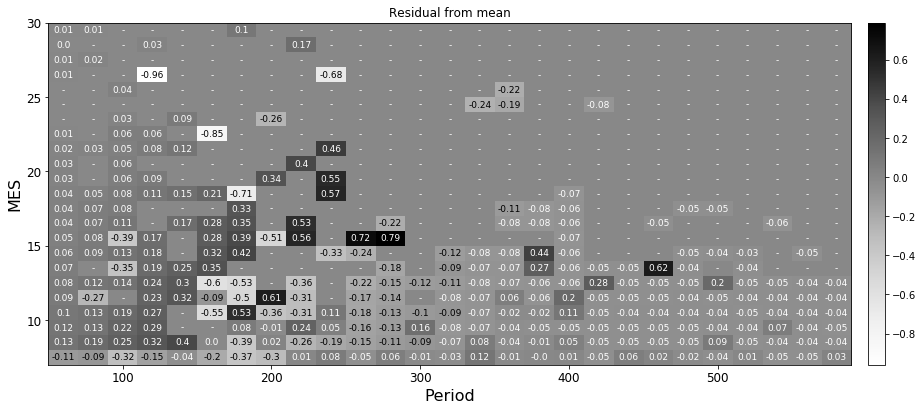

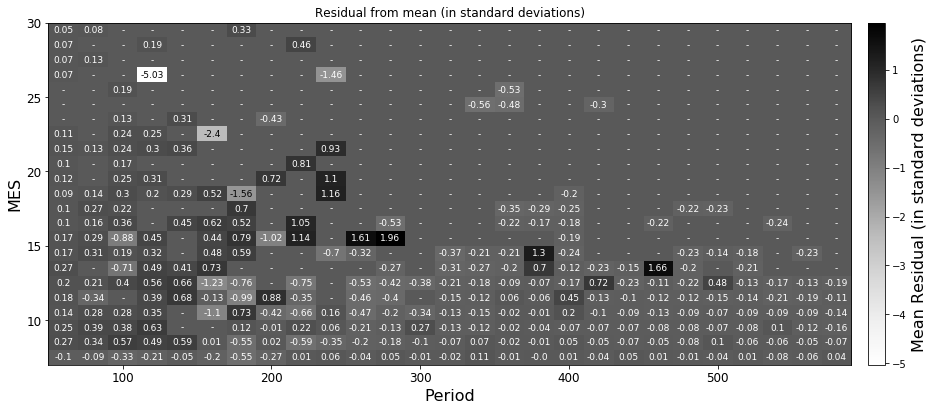

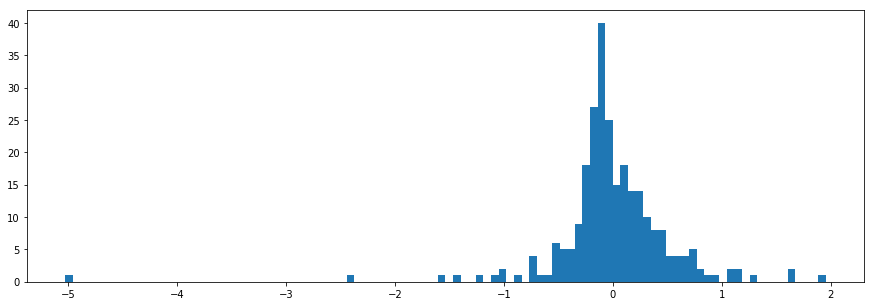

In [53]:
fitDiff = fitFracMean - obsFpFrac
fitDiffNorm =np.zeros(fitDiff.shape)
fitDiffNorm[stdObsFit>0] = fitDiff[stdObsFit>0]/stdObsFit[stdObsFit>0];

drawHeatMap(np.round(fitDiff, 2), (15,15), cellPeriod, cellMes, nData = obsTceGrid, forceInt = False);           
plt.title("Residual from mean");
plt.ylabel('MES', fontsize = 16);
plt.xlabel('Period', fontsize = 16);

drawHeatMap(np.round(fitDiffNorm, 2), (15,15), cellPeriod, cellMes, nData = obsTceGrid, 
            colorBarLabel="Mean Residual (in standard deviations)", forceInt = False); 
plt.ylabel('MES', fontsize = 16);
plt.xlabel('Period', fontsize = 16);
plt.savefig(outputDir + "obsFPMeanResid.pdf",bbox_inches='tight')
plt.title("Residual from mean (in standard deviations)");

plt.figure(figsize=(15,5));
plt.hist(fitDiffNorm.flatten()[nObsTce > 0], 100);

np.median(fitDiffNorm.flatten()[nObsTce > 0])



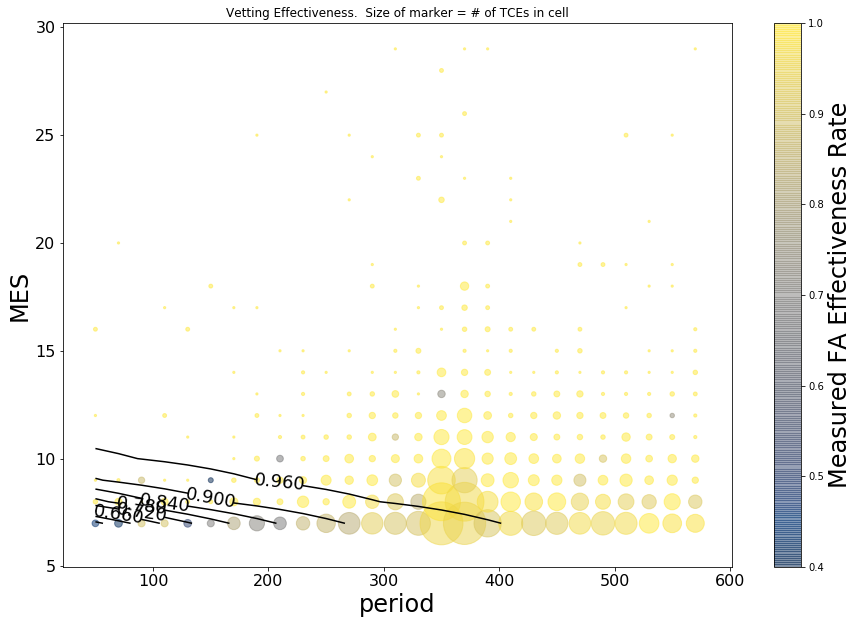

In [54]:
fig, ax = plt.subplots(figsize=(15,10));
Z = funcModels.rateModel(cellX, cellY, fitThetaFPE, fpeModel);
CS = ax.contour(cellPeriod, cellMes, Z, colors='k');
ax.clabel(CS, inline=1, fontsize=18);
scf = ax.scatter(cellPeriod[tceGrid>0], cellMes[tceGrid>0], cmap="cividis", c=fpFrac[tceGrid>0], s=5*tceGrid[tceGrid>0], alpha = 0.5);
plt.xlabel("period", fontSize = 24);
plt.ylabel("MES", fontSize = 24);
cbh = plt.colorbar(scf);
cbh.ax.set_ylabel("Measured FA Effectiveness Rate", fontSize = 24);
plt.tick_params(labelsize = 16)
plt.savefig(outputDir + "fpEffContours.pdf",bbox_inches='tight')
plt.title("Vetting Effectiveness.  Size of marker = # of TCEs in cell");



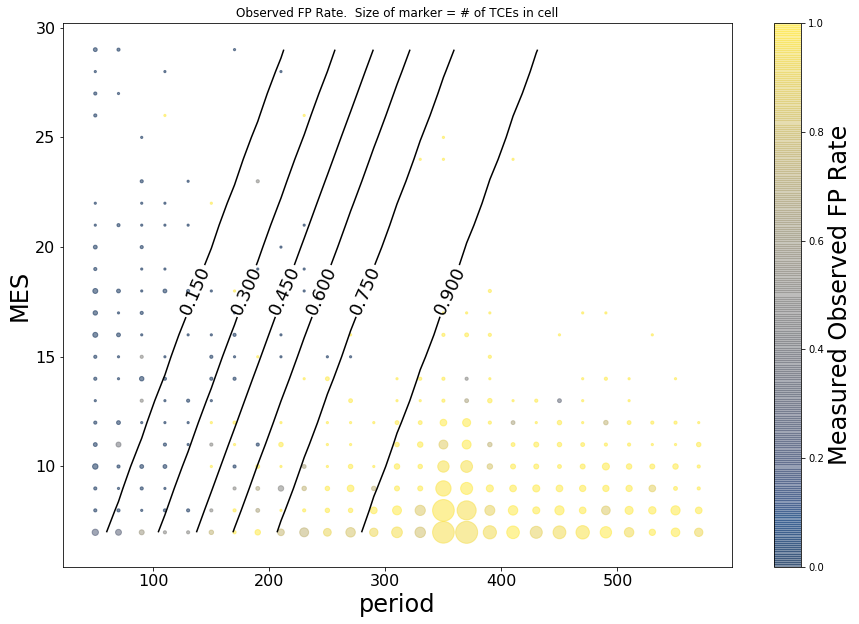

In [55]:
fig, ax = plt.subplots(figsize=(15,10));
Z = funcModels.rateModel(cellX, cellY, fpFitTheta, obsFpModel);
CS = ax.contour(cellPeriod, cellMes, Z, colors='k');
ax.clabel(CS, inline=1, fontsize=18);
scf = ax.scatter(cellPeriod[obsTceGrid>0], cellMes[obsTceGrid>0], cmap="cividis", c=obsFpFrac[obsTceGrid>0], s=5*obsTceGrid[obsTceGrid>0], alpha = 0.5);
plt.xlabel("period", fontSize = 24);
plt.ylabel("MES", fontSize = 24);
cbh = plt.colorbar(scf);
cbh.ax.set_ylabel("Measured Observed FP Rate", fontSize = 24);
plt.tick_params(labelsize = 16)
plt.savefig(outputDir + "obsFPContours.pdf",bbox_inches='tight')
plt.title("Observed FP Rate.  Size of marker = # of TCEs in cell");


In [56]:
aic = 2*len(fitTheta) - 2*lnBinlike1(fitTheta, tceData, fpeModel, obsFpModel)
aic

763.0883542243484

In [57]:
l = np.zeros(np.shape(samples)[0])
aicDist = np.zeros(np.shape(samples)[0])
progress = FloatProgress(min=0, max=samples.shape[0])
display(progress)

for i in range(np.shape(samples)[0]):
    l[i] = lnBinprob(samples[i,:], tceData, fpeModel, obsFpModel)
    aicDist[i] = 2*len(samples[i,:]) - 2*lnBinlike1(samples[i,:], tceData, fpeModel, obsFpModel)
    progress.value += 1


FloatProgress(value=0.0, max=500000.0)

In [58]:
minAic = min(aicDist)

In [59]:
import os.path
import pickle

fname = outputDir + "fpEffectivenessJointTable.pkl"
if os.path.isfile(fname):
    modelComparisonTable = pd.read_pickle(fname)
else:
    modelComparisonTable = pd.DataFrame({"Model": ["rotatedLogisticX0", "rotatedLogisticX02", "constant", 
                                              "dualBrokenPowerLaw", "gaussian", "rotatedLogisticX0xlogisticY0",
                                              "rotatedLogisticX0+gaussian", "rotatedLogisticY", "rotatedLogisticYXLogisticY", 
                                              "logisticY", "rotatedLogisticYXFixedLogisticY"], 
                                    "medianMCMCAIC": [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
                                    "minMCMCAIC": [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
                                    "medianMCMCFpeTheta": [[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]],
                                    "medianMCMCOpsFPTheta": [[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]],
                                    "periodRange": [[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]],
                                    "mesRange": [[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]]},
                                    columns=["Model","AICRelativeProb",
                                             "medianMCMCAIC","minMCMCAIC","medianMCMCFpeTheta", "medianMCMCOpsFPTheta",
                                             "periodRange","mesRange"])



In [60]:
mctIndex = np.where(modelComparisonTable["Model"].isin([fpeModel]))[0][0]
print(mctIndex)
modelComparisonTable["medianMCMCAIC"][mctIndex] = aic;
modelComparisonTable["minMCMCAIC"][mctIndex] = minAic;
modelComparisonTable["medianMCMCFpeTheta"][mctIndex] = fitThetaFPE;
modelComparisonTable["medianMCMCOpsFPTheta"][mctIndex] = fpFitTheta;
modelComparisonTable["periodRange"][mctIndex] = [periodMin, periodMax];
modelComparisonTable["mesRange"][mctIndex] = [mesMin, mesMax];

0


/Users/steve/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/steve/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/steve/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexin

In [61]:
modelToCompareIndex = 0
modelComparisonTable["AICRelativeProb"] = 0.
minAic = np.min(modelComparisonTable["medianMCMCAIC"][modelToCompareIndex])

for i in range(len(modelComparisonTable)):
    modelComparisonTable["AICRelativeProb"].iloc[i] = np.exp((minAic - modelComparisonTable["medianMCMCAIC"].iloc[i])/2.)


/Users/steve/anaconda3/envs/py2/lib/python2.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [62]:
modelComparisonTable

,Model,AICRelativeProb,medianMCMCAIC,minMCMCAIC,medianMCMCFpeTheta,medianMCMCOpsFPTheta,periodRange,mesRange
0,rotatedLogisticX0,1.000000e+00,763.088354,762.069213,"[1.1036826673269728, 26.110855700974906, 0.980...","[0.6786107885931881, 11.650461694030332, 0.957...","[50, 600]","[7, 30]"
1,rotatedLogisticX02,5.041163e+165,0.000000,0.000000,[0],[0],[0],[0]
2,constant,5.041163e+165,0.000000,0.000000,[0],[0],[0],[0]
3,dualBrokenPowerLaw,5.041163e+165,0.000000,0.000000,[0],[0],[0],[0]
4,gaussian,5.041163e+165,0.000000,0.000000,[0],[0],[0],[0]
5,rotatedLogisticX0xlogisticY0,5.041163e+165,0.000000,0.000000,[0],[0],[0],[0]
6,rotatedLogisticX0+gaussian,5.041163e+165,0.000000,0.000000,[0],[0],[0],[0]
7,rotatedLogisticY,5.041163e+165,0.000000,0.000000,[0],[0],[0],[0]
8,rotatedLogisticYXLogisticY,5.041163e+165,0.000000,0.000000,[0],[0],[0],[0]
9,logisticY,5.041163e+165,0.000000,0.000000,[0],[0],[0],[0]


In [63]:
modelComparisonTable.to_pickle(fname)

In [64]:
%%javascript
IPython.notebook.save_notebook()

<IPython.core.display.Javascript object>

In [65]:
%%bash -s "$htmlLabel"
jupyter nbconvert --to html jointBinFPEandObsFP.ipynb
mv jointBinFPEandObsFP.html htmlArchive/jointBinFPEandObsFP_$1.html

[NbConvertApp] Converting notebook jointBinFPEandObsFP.ipynb to html
[NbConvertApp] Writing 3761587 bytes to jointBinFPEandObsFP.html
